# Multilayer perceptron
### Import libraries

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Input, Dense, Dropout # type: ignore
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from tensorflow.keras.models import load_model # type: ignore

### Data loading 

In [9]:
df = pd.read_csv('cocomo81_preprocessed.csv')
df.describe()

,rely,data,cplx,time,stor,turn,acap,aexp,lexp,modp,tool,sced,loc,actual
count,63.000000,63.000000,63.000000,63.000000,63.00000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1.036349,1.003968,1.091429,1.113810,1.14381,0.971746,0.905238,0.948571,1.001429,1.004127,1.016984,1.048889,3.276913,4.795678
std,0.193477,0.073431,0.202563,0.161639,0.17942,0.080973,0.151507,0.119243,0.051988,0.130935,0.085735,0.075586,1.292031,1.677660
min,0.750000,0.940000,0.700000,1.000000,1.00000,0.870000,0.710000,0.820000,0.950000,0.820000,0.830000,1.000000,1.091923,1.931521
25%,0.880000,0.940000,1.000000,1.000000,1.00000,0.870000,0.860000,0.820000,0.950000,0.910000,1.000000,1.000000,2.265869,3.725621
50%,1.000000,1.000000,1.070000,1.060000,1.06000,1.000000,0.860000,1.000000,1.000000,1.000000,1.000000,1.000000,3.258097,4.595120
75%,1.150000,1.040000,1.300000,1.110000,1.21000,1.000000,1.000000,1.000000,1.000000,1.100000,1.100000,1.080000,4.110874,6.083915
max,1.400000,1.160000,1.650000,1.660000,1.56000,1.150000,1.460000,1.290000,1.140000,1.240000,1.240000,1.230000,5.764878,7.789248


### Training a Multilayer Perceptron model

In [11]:

target = 'actual'
y = df[target].values
X = df.drop(columns=[target]).values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train size: {X_train.shape}')
print(f'X_test size: {X_val.shape}')

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_train size: (50, 13)
X_test size: (13, 13)


In [12]:
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(64, activation='relu'),  # First hidden layer
    Dropout(0,2),
    Dense(32, activation='relu'),  # Second hidden layer
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=300,
    batch_size=8,
    callbacks=[early_stopping]
)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 27.3359 - mae: 4.9767 - val_loss: 24.5356 - val_mae: 4.7158
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26.9644 - mae: 4.9282 - val_loss: 22.2547 - val_mae: 4.4589
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 24.9544 - mae: 4.7214 - val_loss: 20.3536 - val_mae: 4.2344
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 20.2812 - mae: 4.1944 - val_loss: 18.6141 - val_mae: 4.0177
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 18.8939 - mae: 4.1173 - val_loss: 16.8873 - val_mae: 3.7895
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 17.9033 - mae: 3.9637 - val_loss: 15.2007 - val_mae: 3.5511
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.9526 - mae: 3.5080 - val_loss: 13.3699 - val_mae: 3.2697
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 13.6437 - mae: 3.4166 - val_loss: 11.4657 - val_mae: 2.9457
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss

In [14]:
model.save('cocomo81_model.keras')

In [7]:
model = load_model('cocomo81_model.keras')
first_y_pred = model.predict(X_val)
first_y_pred = first_y_pred.flatten()


mae = mean_absolute_error(y_val, first_y_pred)
rmse = root_mean_squared_error(y_val, first_y_pred)
print(f"mae {mae} rmse {rmse}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
mae 0.8904067260575051 rmse 1.144800196401199


### Applying PSO to optimize MLP hyperparameters
- Hyperparameters to be optimized
    - hidden layer sizes (int)
    - units per layer (int)
    - activation (relu, tanh, sigmod)
    - dropout rate (float)
    - optimizer (adam, sgd, rmsprop)
    - learning rate (float)
    - batch size (int)

In [9]:

# Define bound for each parameter
param_bounds = {
    'hlayer_sizes': (1, 10),            
    'units': (8, 64),
    'dropout_rate': (0.0, 0.5),            
    'learning_rate': (0.0001, 0.01),
    'batch_size': (4, 32),
}
activation_list = ['relu', 'tanh', 'sigmoid']
optimizer_list = ['adam', 'sgd', 'rmsprop']



# Define MLP model building function
def build_mlp_model(params, activation, optimizer_name):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X.shape[1],)))

    for _ in range(int(round(params['hlayer_sizes']))):
        model.add(tf.keras.layers.Dense(int(round(params['units'])), activation=activation))
        model.add(tf.keras.layers.Dropout(params['dropout_rate']))

    model.add(tf.keras.layers.Dense(1))

    optimizer = {
        'adam': tf.keras.optimizers.Adam,
        'sgd': tf.keras.optimizers.SGD,
        'rmsprop': tf.keras.optimizers.RMSprop
    }[optimizer_name](learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mae'])
    return model




# Define model evaluation function
def evaluate_model(params, activation_idx, optimizer_idx, k=5):
    activation = activation_list[int(round(activation_idx))]
    optimizer = optimizer_list[int(round(optimizer_idx))]

    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    val_scores = []

    for train_index, val_index in kf.split(X):
        X_train_v, X_val_v = X[train_index], X[val_index]
        y_train_v, y_val_v = y[train_index], y[val_index]
        
        scaler = StandardScaler()
        X_train_v = scaler.fit_transform(X_train_v)
        X_val_v = scaler.transform(X_val_v)
        
        model = build_mlp_model(params, activation, optimizer)
        
        early_stopping = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )

        history = model.fit(
            X_train_v, y_train_v,
            validation_data=(X_val_v, y_val_v),
            epochs=200,
            batch_size=int(round(params['batch_size'])),
            verbose=0,
            callbacks=[early_stopping]
        )
        val_mae = min(history.history['val_mae'])
        val_scores.append(val_mae)

    return np.mean(val_scores)





# Define particle class
class Particle:
    def __init__(self):
        self.position = {
            'hlayer_sizes': np.random.randint(*param_bounds['hlayer_sizes']),
            'units': np.random.randint(*param_bounds['units']),
            'dropout_rate': np.random.uniform(*param_bounds['dropout_rate']),
            'learning_rate': np.random.uniform(*param_bounds['learning_rate']),
            'batch_size': np.random.randint(*param_bounds['batch_size']),
            'activation_idx': random.randint(0, len(activation_list) - 1),
            'optimizer_idx': random.randint(0, len(optimizer_list) - 1),
        }
        self.velocity = {key: 0 for key in self.position}
        self.best_position = dict(self.position)
        self.best_score = float('inf')




# Define pso function
# https://arxiv.org/pdf/2101.11944
def pso(n_particles=5, n_iterations=10, w=0.5, c1=1.9, c2=1.9):
    swarm = [Particle() for _ in range(n_particles)]
    global_best = {'score': float('inf'), 'position': None}

    for iteration in range(n_iterations):
        print(f"Iteration {iteration+1}/{n_iterations}", end=" ")
        for particle in swarm:
            score = evaluate_model(particle.position,
                                   particle.position['activation_idx'],
                                   particle.position['optimizer_idx'])

            if score < particle.best_score:
                particle.best_score = score
                particle.best_position = dict(particle.position)

            if score < global_best['score']:
                global_best['score'] = score
                global_best['position'] = dict(particle.position)

        for particle in swarm:
            for key in particle.position:
                r1, r2 = np.random.rand(), np.random.rand()
                cognitive = c1 * r1 * (particle.best_position[key] - particle.position[key])
                social = c2 * r2 * (global_best['position'][key] - particle.position[key])
                particle.velocity[key] = w * particle.velocity[key] + cognitive + social
                particle.position[key] += particle.velocity[key]

                if key in param_bounds:
                    low, high = param_bounds[key]
                    particle.position[key] = np.clip(particle.position[key], low, high)

                elif key.endswith('_idx'):
                    particle.position[key] = int(np.clip(particle.position[key], 0, len(activation_list) - 1))
        print(f"MAE: {global_best['score']}")
    return global_best

In [113]:
best_result = pso(n_particles=10, n_iterations=10)
print("Best MAE:", best_result['score'])
print("Best Hyperparameters:")
for key, value in best_result['position'].items():
    if key.endswith('_idx'):
        if key == 'activation_idx':
            print("activation:", activation_list[int(round(value))])
        elif key == 'optimizer_idx':
            print("optimizer:", optimizer_list[int(round(value))])
    else:
        print(f"{key}: {value}")

Iteration 1/10 MAE: 0.5563963174819946
Iteration 2/10 MAE: 0.5563963174819946
Iteration 3/10 MAE: 0.5008383452892303
Iteration 4/10 MAE: 0.482201361656189
Iteration 5/10 MAE: 0.44958234429359434
Iteration 6/10 MAE: 0.4450447380542755
Iteration 7/10 MAE: 0.4450447380542755
Iteration 8/10 MAE: 0.4450447380542755
Iteration 9/10 MAE: 0.4450447380542755
Iteration 10/10 MAE: 0.4450447380542755
Best MAE: 0.4450447380542755
Best Hyperparameters:
hlayer_sizes: 1.0
units: 45.6563022489103
dropout_rate: 0.403427648757625
learning_rate: 0.00512141355419011
batch_size: 29.272828700045608
activation: tanh
optimizer: rmsprop


In [19]:
import json
best_result = {}
# Load hyperparameters
with open("../cocomo81/best_mlp_hyperparams.json", "r") as f:
    best_result['position'] = json.load(f)

In [115]:
activation = activation_list[int(best_result['position']['activation_idx'])]
optimizer = optimizer_list[int(best_result['position']['optimizer_idx'])]

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)

model = build_mlp_model(best_result['position'], activation, optimizer)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=500,
    batch_size=int(round(best_result['position']['batch_size'])),
    callbacks=[early_stopping]
)

Epoch 1/500
2/2 [==============================] - 1s 132ms/step - loss: 28.0233 - mae: 4.8846 - val_loss: 21.5744 - val_mae: 4.4224
Epoch 2/500
2/2 [==============================] - 0s 31ms/step - loss: 23.9149 - mae: 4.5962 - val_loss: 20.1041 - val_mae: 4.2798
Epoch 3/500
2/2 [==============================] - 0s 31ms/step - loss: 22.4065 - mae: 4.4880 - val_loss: 19.2355 - val_mae: 4.1923
Epoch 4/500
2/2 [==============================] - 0s 27ms/step - loss: 20.8481 - mae: 4.3651 - val_loss: 18.3673 - val_mae: 4.1043
Epoch 5/500
2/2 [==============================] - 0s 30ms/step - loss: 19.9319 - mae: 4.2895 - val_loss: 17.5255 - val_mae: 4.0098
Epoch 6/500
2/2 [==============================] - 0s 25ms/step - loss: 19.1636 - mae: 4.1901 - val_loss: 16.6239 - val_mae: 3.9057
Epoch 7/500
2/2 [==============================] - 0s 27ms/step - loss: 17.2825 - mae: 3.9781 - val_loss: 15.6624 - val_mae: 3.7964
Epoch 8/500
2/2 [==============================] - 0s 22ms/step - loss: 15.

### Final evaluation

In [112]:
y_pred_val_log = model.predict(X_val)

# flatten to ensure it's a 1D array
y_pred_log = y_pred_val_log.flatten()

# avoid divide by 0
y_val_nonzero_log = y_val[y_val != 0]
y_pred_nonzero_log = y_pred_log[y_val != 0]

mse = mean_squared_error(y_val, y_pred_log)
mae = mean_absolute_error(y_val, y_pred_log)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_log)

mape = np.mean(np.abs((y_val_nonzero_log - y_pred_nonzero_log) / y_val_nonzero_log))

mmre = np.mean(np.abs((y_val_nonzero_log - y_pred_nonzero_log) / y_val_nonzero_log))

mdmre = np.median(np.abs((y_val_nonzero_log - y_pred_nonzero_log) / y_val_nonzero_log))

pred_25 = np.mean(np.abs((y_val_nonzero_log - y_pred_nonzero_log) / y_val_nonzero_log) <= 0.25)

print(f"MSE         : {mse:.4f}")
print(f"MAE         : {mae:.4f}")
print(f"RMSE        : {rmse:.4f}")
print(f"R²          : {r2:.4f}")
print(f"MAPE        : {mape * 100:.2f}%")
print(f"MMRE        : {mmre:.4f}")
print(f"MdMRE       : {mdmre:.4f}")
print(f"PRED(25)    : {pred_25 * 100:.2f}%")


print()
n_bootstraps = 500
bootstrap_metrics = {'mse': [], 'mae': [], 'r2': [], 'mape': [], 'mmre': [], 'mdmre': [], 'pred25': []}
for _ in range(n_bootstraps):
    indices = np.random.choice(len(y_val), len(y_val), replace=True)
    y_val_boot = y_val[indices]
    y_pred_boot = y_pred_log[indices]
    bootstrap_metrics['mse'].append(mean_squared_error(y_val_boot, y_pred_boot))
    bootstrap_metrics['mae'].append(mean_absolute_error(y_val_boot, y_pred_boot))
    bootstrap_metrics['r2'].append(r2_score(y_val_boot, y_pred_boot))
    y_val_boot_nonzero = y_val_boot[y_val_boot != 0]
    y_pred_boot_nonzero = y_pred_boot[y_pred_boot != 0]
    bootstrap_metrics['mape'].append(np.mean(np.abs((y_val_boot_nonzero - y_pred_boot_nonzero) / y_val_boot_nonzero)))
    bootstrap_metrics['mmre'].append(np.mean(np.abs((y_val_boot_nonzero - y_pred_boot_nonzero) / y_val_boot_nonzero)))
    bootstrap_metrics['mdmre'].append(np.median(np.abs((y_val_boot_nonzero - y_pred_boot_nonzero) / y_val_boot_nonzero)))
    bootstrap_metrics['pred25'].append(np.mean(np.abs((y_val_boot_nonzero - y_pred_boot_nonzero) / y_val_boot_nonzero) <= 0.25))
    
print(f"MSE         : {np.std(bootstrap_metrics['mse']):.4f}")
print(f"MAE         : {np.std(bootstrap_metrics['mae']):.4f}")
print(f"RMSE        : {np.std(np.sqrt(bootstrap_metrics['mse'])):.4f}")
print(f"R²          : {np.std(bootstrap_metrics['r2']):.4f}")
print(f"MAPE        : {np.std(bootstrap_metrics['mape']) * 100:.2f}%")
print(f"MMRE        : {np.std(bootstrap_metrics['mmre']):.4f}")
print(f"MdMRE       : {np.std(bootstrap_metrics['mdmre']):.4f}")
print(f"PRED(25)    : {np.std(bootstrap_metrics['pred25'])* 100:.2f}%")

1/1 [==============================] - 0s 33ms/step
MSE         : 0.4147
MAE         : 0.4857
RMSE        : 0.6439
R²          : 0.8340
MAPE        : 12.77%
MMRE        : 0.1277
MdMRE       : 0.0774
PRED(25)    : 84.62%

MSE         : 0.1903
MAE         : 0.1193
RMSE        : 0.1493
R²          : 0.2066
MAPE        : 3.55%
MMRE        : 0.0355
MdMRE       : 0.0453
PRED(25)    : 10.05%


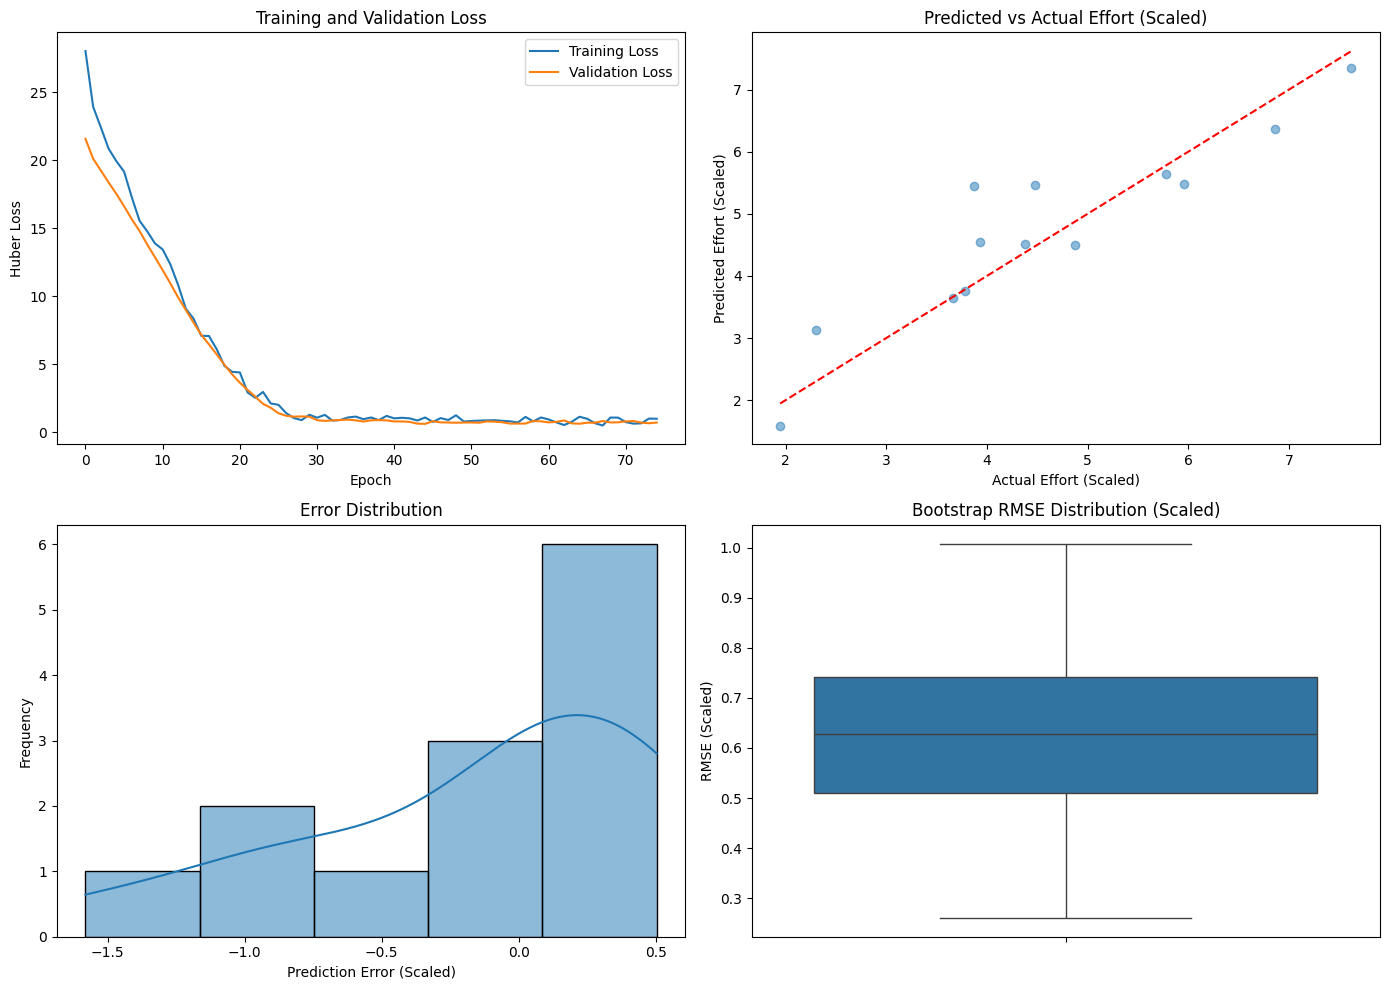

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Loss
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Huber Loss')
plt.legend()

# Predicted vs Actual
plt.subplot(2, 2, 2)
plt.scatter(y_val, y_pred_log, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.title('Predicted vs Actual Effort (Scaled)')
plt.xlabel('Actual Effort (Scaled)')
plt.ylabel('Predicted Effort (Scaled)')

# Error Distribution
errors = y_val - y_pred_log
plt.subplot(2, 2, 3)
sns.histplot(errors, kde=True)
plt.title('Error Distribution')
plt.xlabel('Prediction Error (Scaled)')
plt.ylabel('Frequency')

# Bootstrap RMSE
plt.subplot(2, 2, 4)
sns.boxplot(y=np.sqrt(bootstrap_metrics['mse']))
plt.title('Bootstrap RMSE Distribution (Scaled)')
plt.ylabel('RMSE (Scaled)')

plt.tight_layout()
plt.show()